In [ ]:
# Install necessary libraries
!pip install tensorflow
!pip install keras
!pip install opencv-python
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install seaborn


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define project path
project_path = '/content/drive/My Drive/Autism_Detection_Facial_Features'
dataset_path = os.path.join(project_path, 'Dataset')

# Check the contents of the Dataset folder
print("Contents of Dataset folder:")
print(os.listdir(dataset_path))


Mounted at /content/drive
Contents of Dataset folder:
['autism-2.txt', 'autism-S-224-89.33.h5', 'consolidated', 'test', 'valid', 'train']


In [2]:
# Explore train, test, and valid folders
for folder in ['train', 'test', 'valid']:
    folder_path = os.path.join(dataset_path, folder)
    print(f"\nContents of {folder}:")
    if os.path.exists(folder_path):
        print(os.listdir(folder_path))
    else:
        print(f"{folder} folder does not exist.")



Contents of train:
['autistic', 'non_autistic']

Contents of test:
['non_autistic', 'autistic']

Contents of valid:
['autistic', 'non_autistic']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generators with augmentation for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,       # Normalize pixel values to [0, 1]
    rotation_range=30,     # Randomly rotate images
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2,# Randomly shift images vertically
    shear_range=0.2,       # Shear transformations
    zoom_range=0.2,        # Zoom transformations
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'    # Fill pixels when transformations are applied
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)  # Only normalize validation images

# Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=(64, 64),  # Resize all images to 64x64
    batch_size=32,
    class_mode='binary'    # Binary classification (autistic vs non-autistic)
)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = valid_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    shuffle=False          # No shuffling for test data
)


Found 2546 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


(32, 64, 64, 3)
[1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0.]


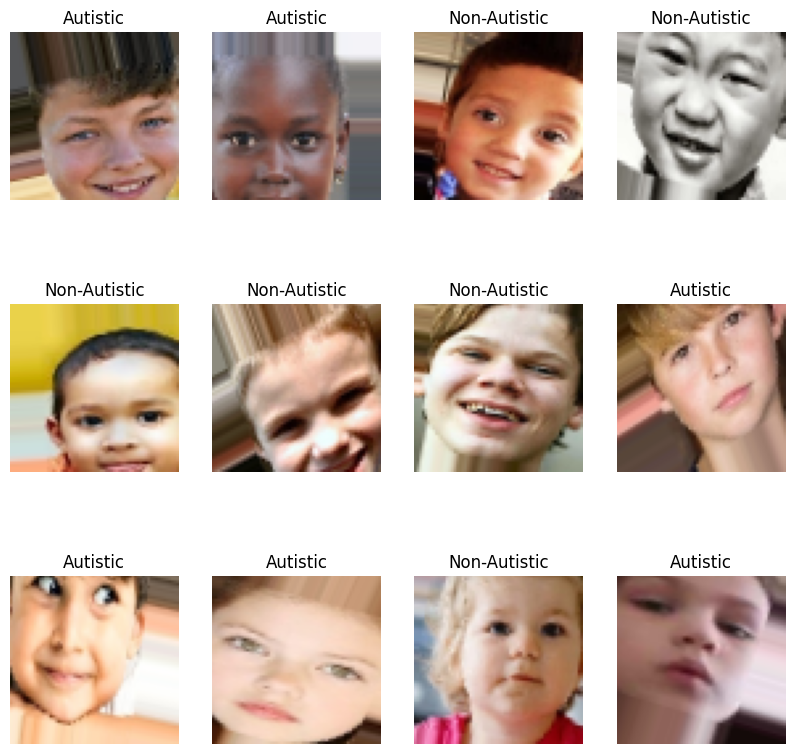

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# You should already have 'train_generator' or any other dataset generator defined

# Set up the plot with a specific figure size
plt.figure(figsize=(10, 10))

# Take one batch of images and labels from the training dataset (you can change to test or valid dataset as needed)
for image_batch, labels_batch in train_generator:
    print(image_batch.shape)  # Print the shape of the image batch (e.g., (32, 64, 64, 3))
    print(labels_batch)  # Print the labels in numpy format (e.g., array of 0s and 1s for non_autistic and autistic)

    # Display 12 images from the batch
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)  # Create a 3x4 grid of subplots
        plt.imshow(image_batch[i])  # Display the image
        plt.title("Autistic" if labels_batch[i] == 1 else "Non-Autistic")  # Set the title to the class name
        plt.axis("off")  # Turn off the axis

    # Break after displaying one batch (optional, you can remove this line to display more)
    break

# Show the plot
plt.show()


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 691,521 (2.64 MB)

 Trainable params: 691,521 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # You can adjust the number of epochs
    validation_data=valid_generator,
    callbacks=[early_stopping]
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 502s 6s/step - accuracy: 0.5155 - loss: 0.7014 - val_accuracy: 0.6500 - val_loss: 0.6910
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 150ms/step - accuracy: 0.5398 - loss: 0.6840 - val_accuracy: 0.6200 - val_loss: 0.6536
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.6289 - loss: 0.6608 - val_accuracy: 0.6700 - val_loss: 0.5864
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 151ms/step - accuracy: 0.6444 - loss: 0.6214 - val_accuracy: 0.6900 - val_loss: 0.5570
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.6783 - loss: 0.6045 - val_accuracy: 0.7000 - val_loss: 0.5780
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.6472 - loss: 0.6157 - val_accuracy: 0.7100 - val_loss: 0.5594
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - accuracy: 0.6594 - loss: 0.5997 - val_accuracy: 0.6400 - val_loss: 0.6128
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.6624 - loss: 0.6096 - val_accuracy: 0.6800 

In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 10s/step - accuracy: 0.7762 - loss: 0.5075
Test Loss: 0.4604567587375641
Test Accuracy: 0.7900000214576721


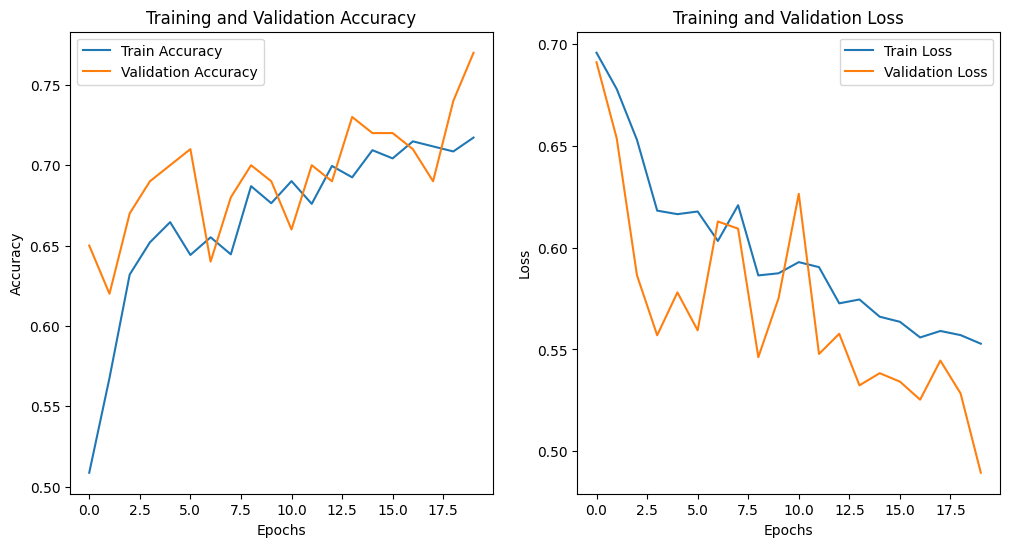

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


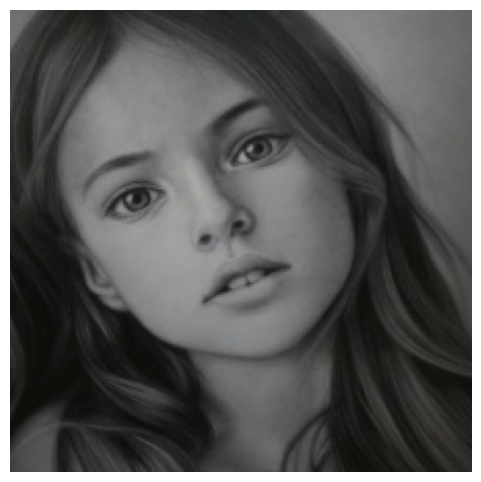

Predicted Class: Non-Autistic


In [19]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Define the path to the test images folder
test_image_dir = '/content/drive/My Drive/Autism_Detection_Facial_Features/Dataset/test/non_autistic/'

# List all files in the test directory
image_files = os.listdir(test_image_dir)

# Randomly select an image from the directory
sample_image_path = os.path.join(test_image_dir, random.choice(image_files))

# Load the image at its original size (for clear display)
img_original = image.load_img(sample_image_path)  # Load image at original size
img_original_array = image.img_to_array(img_original)  # Convert to numpy array

# Resize the image for model input (64x64 as required)
img = img_original.resize((64, 64))  # Resize for prediction
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize for model

# Predict with the model
prediction = model.predict(img_array)

# Display the original image at its original resolution
plt.figure(figsize=(6, 6))  # Set figure size for clarity
plt.imshow(img_original_array.astype('uint8'))  # Convert to uint8 for clear display
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

# Print the prediction result
if prediction[0] > 0.5:
    print("Predicted Class: Autistic")
else:
    print("Predicted Class: Non-Autistic")


In [20]:
import os
import tensorflow as tf

# Define the folder where the model will be saved
model_save_dir = '/content/drive/My Drive/Autism_Detection_Facial_Features/saved_models/'

# Create the directory if it doesn't exist
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)

# Get a list of all saved model versions in the directory
saved_models = os.listdir(model_save_dir)

# Extract version numbers (assuming saved models are in the format 'model_v1.keras', 'model_v2.keras', etc.)
version_numbers = []
for model in saved_models:
    if model.startswith('autism_model_v') and model.endswith('.keras'):
        try:
            version = int(model.split('_v')[1].split('.keras')[0])
            version_numbers.append(version)
        except ValueError:
            continue

# If there are no models, start with version 1
if not version_numbers:
    new_version = 1
else:
    # Increment the highest version number by 1
    new_version = max(version_numbers) + 1

# Define the new model filename with the version number
new_model_filename = f'autism_model_v{new_version}.keras'
model_save_path = os.path.join(model_save_dir, new_model_filename)

# Save the model in the native Keras format (.keras)
model.save(model_save_path)
print(f"Model saved as: {model_save_path}")


Model saved as: /content/drive/My Drive/Autism_Detection_Facial_Features/saved_models/autism_model_v1.keras


In [22]:
# Re-create the test dataset using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale the pixel values

test_dataset = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Autism_Detection_Facial_Features/Dataset/test',  # Path to test folder
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,  # Use a batch size of 32
    class_mode='binary'  # Since it's binary classification (autistic vs non-autistic)
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 300 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7911 - loss: 0.4781
Test Loss: 0.4604566991329193
Test Accuracy: 0.7900000214576721


In [23]:
!pip install flask flask-restful
!pip install tensorflow  # In case it's not installed
!pip install pillow  # For image handling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.9 MB/s eta 0:00:00
